## Датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness   
В этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе.   
Города дополнительно поделены на северные и южные.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
water = pd.read_csv('water.csv')
water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


Есть ли связь между жёсткостью воды и средней годовой смертностью?

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

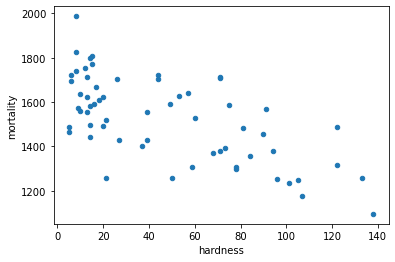

In [4]:
# строим точечный график
water.plot(kind='scatter', x='hardness', y='mortality')

Визуально - есть обратная корреляция

In [9]:
# считаем коээфициент Пирсона
water[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [12]:
# считаем коээфициент Спирмена
water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [13]:
# считаем коээфициент Кэндалла
water[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


В целом, фиксируем - есть обратная корреляция

Построим модель регрессии:

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
X = water[['hardness']]
y = water['mortality']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
model.coef_

array([-3.13167087])

In [24]:

model.intercept_

1668.9722977277095

In [25]:
y_pred = model.predict(X_test)

In [26]:
model.score(X_test, y_test) # посмотрим значение коэффициента детерминации

0.5046490611017092

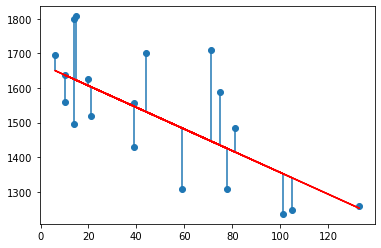

In [27]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.vlines(X_test, y_pred, y_test)

Посмотрим на график остатков:

In [30]:
residuals = y_test - y_pred

In [32]:
import seaborn as sns

<AxesSubplot:ylabel='mortality'>

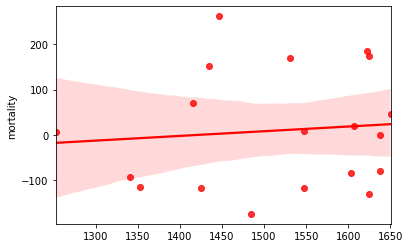

In [33]:
sns.regplot(x = y_pred, y = residuals, data = None, scatter = True, color = 'red')

Нет определенной зависимости и довольно хаотично разбросаны, что говорит о неплохой модели, хотя и коэффицент детерминации не самый высокий.

### Разделим данные на южные и северные территории
#### Северные территории

In [34]:
water_n = water[water['location'] == 'North']
water_n.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


In [35]:
water_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35 non-null     int64 
 1   location    35 non-null     object
 2   town        35 non-null     object
 3   mortality   35 non-null     int64 
 4   hardness    35 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ KB


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

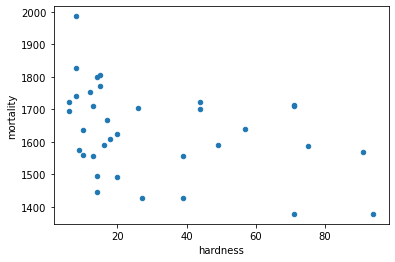

In [36]:
# строим точечный график
water_n.plot(kind='scatter', x='hardness', y='mortality')

In [37]:
# считаем коээфициент Пирсона
water_n[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [38]:
# считаем коээфициент Спирмена
water_n[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [39]:
# считаем коээфициент Кэндалла
water_n[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


Для серенвых регионов коэффициенты несколько хуже, чем в общей выборке.   
Посмотрим, что с моделью регрессии:

In [41]:
X = water_n[['hardness']]
y = water_n['mortality']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(X_test)

In [45]:
model.score(X_test, y_test) # посмотрим значение коэффициента детерминации

0.018885304285745863

Коэффициент детерминации низкий.

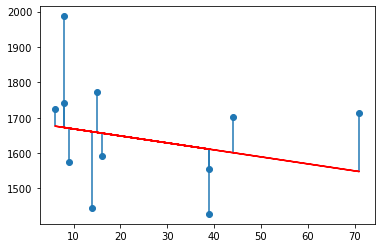

In [46]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.vlines(X_test, y_pred, y_test)

In [47]:
residuals = y_test - y_pred

<AxesSubplot:ylabel='mortality'>

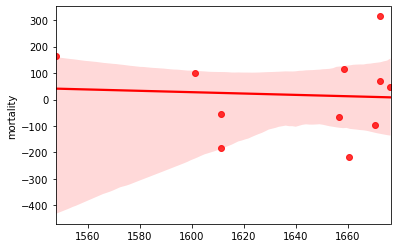

In [48]:
sns.regplot(x = y_pred, y = residuals, data = None, scatter = True, color = 'red')

Сокращение набора данных уже дает модель похуже.

#### Южные территории

In [49]:
water_s = water[water['location'] == 'South']
water_s.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

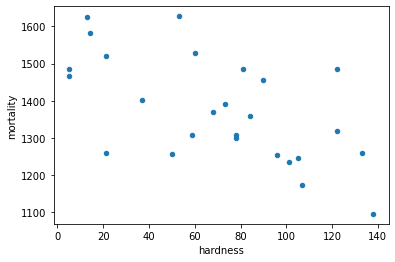

In [50]:
# строим точечный график
water_s.plot(kind='scatter', x='hardness', y='mortality')

In [51]:
# считаем коээфициент Пирсона
water_s[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [52]:
# считаем коээфициент Спирмена
water_s[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [54]:
# считаем коээфициент Кэндалла
water_s[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


Коэффициенты схожи с общей выборкой, посмотрим на линейную регрессию^

In [55]:
X = water_s[['hardness']]
y = water_s['mortality']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [57]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [58]:
y_pred = model.predict(X_test)

In [59]:
model.score(X_test, y_test) # посмотрим значение коэффициента детерминации

-2.5519223012352077

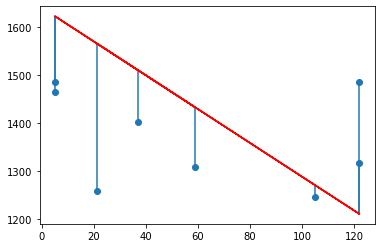

In [60]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.vlines(X_test, y_pred, y_test)

In [61]:
residuals = y_test - y_pred

<AxesSubplot:ylabel='mortality'>

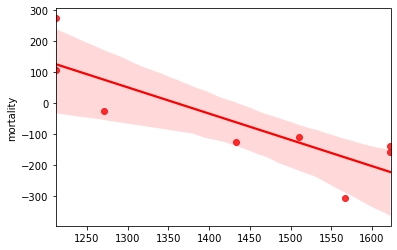

In [62]:
sns.regplot(x = y_pred, y = residuals, data = None, scatter = True, color = 'red')

Результат неожиданный, так как коэффициент детерминации отрицательный, а на графике остатков также видна закономерность в виде синусоиды, если присмотреться.

Считаем, что это объясняется очень малым набором данных, поэтому и сложно обучать модели попробуем увеличить набор данных для обучения:

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [64]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = model.predict(X_test)

In [66]:
model.score(X_test, y_test) # посмотрим значение коэффициента детерминации

0.7724212353112112

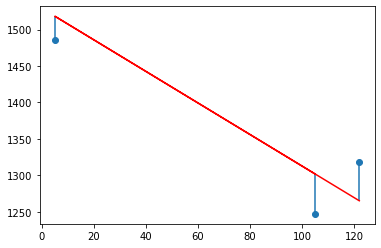

In [67]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.vlines(X_test, y_pred, y_test)

In [68]:
residuals = y_test - y_pred

<AxesSubplot:ylabel='mortality'>

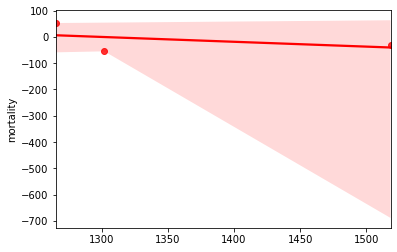

In [69]:
sns.regplot(x = y_pred, y = residuals, data = None, scatter = True, color = 'red')

И сразу видна разница.
Коэффициент детрминации даже выше, чем в общем наборе данных. 
Количество данных для обучения сильно влияет на результат.